In [1]:
import pandas as pd
import os 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def find_theta_for_LLP(LLP_file_dir, theta_file):
    all_matched = []
    os.chdir(LLP_file_dir)
    for LLP_file in os.listdir(LLP_file_dir):
        
        df_LLP = pd.read_csv(LLP_file)
        df_theta = pd.read_csv(theta_file)
        macthed_rows = df_theta[df_theta['ltime'].isin(df_LLP['tau_input'])]
        all_matched.append(macthed_rows)
    
    
    all_matched_rows_df = pd.concat(all_matched)

    # Write the final dataframe to a CSV file
    all_matched_rows_df.to_csv('test_LLP_theta_mass.csv', index=False)
    
    return os.path.join(LLP_file_dir + '/test_LLP_theta_mass.csv')
    
    
def plot_theta_mass(theta_mass_csv):
    df = pd.read_csv(theta_mass_csv)
    plt.scatter(df['mH'], df['theta']**2)
    plt.xlabel('mass/GeV')
    plt.ylabel('theta')
    plt.yscale('log')
    plt.savefig('test_mass_4.png')

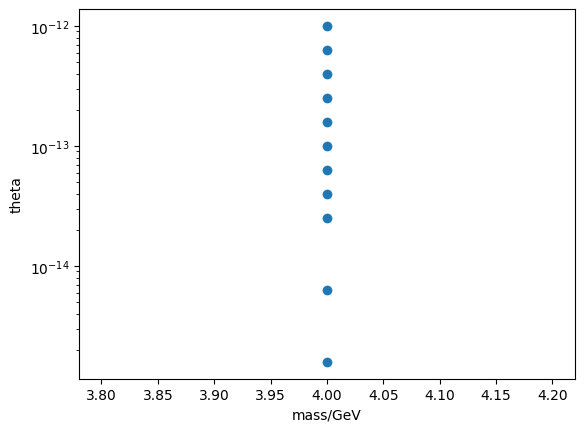

In [30]:
dir_name = '/Users/shiyuzhe/Documents/University/LLP/Second_Term/pythia8/BtoKa/Code/position_read_analyse_1.3/LLP_data_for_test/LLP_theta_mass_is_4'
theta_file = '/Users/shiyuzhe/Documents/University/LLP/Second_Term/pythia8/BtoKa/Code/position_read_analyse_1.3/test_m=4.csv'
mass_theta_file = find_theta_for_LLP(dir_name, theta_file)
plot_theta_mass(mass_theta_file)

In [6]:
def calculate_Br(mphi, sin_square_theta = 6*10**(-8), Br2 = 0.1, g = 0.65):
    default_Br1 = 6*10**(-8)
    default_Br2 = 0.9
    default_g = 2
    mt = 172.76 
    mb = 4.18
    mw = 80.379
    mc = 1.27
    Vts = -0.0405
    Vtb = 0.9991
    Vcb = 0.041
    para1 = (27 * np.square(g))/(256 * np.square(np.pi))
    para2 = (np.square(mt)*np.square(mt))/(np.square(mb)*np.square(mw))
    para3 = np.square(1-np.square(mphi/mb))/0.51 # 0.51 is The phase space Factor. CITE: Limits on a light Higgs boson
    #Or f(x) = (1-8x+x^2)(1- x^2) - 12x^2 lnx CITE: Light Scalar at FASER
    x = np.square(mc/mb)
    f = (1-8*x+x**2)*(1-x**2) - 12*x**2*np.log(x)
    print('f is: ' + f'{f}')
    # para4 = np.square(Vts*Vtb/Vcb)
    para4 = 1
    Br = (sin_square_theta*Br2) * para1 * (para2 * para3 * para4)
    # print((Br2) * para1 * (para2 * para4))
    return Br

calculate_Br(1)

f is: 0.511365146826185


3.725422161461123e-07